# Ising Adiabatic State Preparation

---

## *Review*: Postulate 6

>The time evolution of the state vector $\ket{\psi(t)}$ is governed by the Schrödinger
equation:
$$ 		i\hbar\frac{d}{dt}\ket{\psi(t)} = \hat{H}(t)\ket{\psi(t)},$$

### Time independent case

Imagine the case where $\hat{H}(t) \neq f(t)$. This is just a statement that the Hamiltoninan operator doesn't change in time. 
If that is the case, then we can directly integrate this differential equation, to get the following solution:
$$\begin{align}
\ket{\psi(t)} =& e^{\frac{-i}{\hbar}\hat{H}\Delta t}\ket{\psi(t_0)}, \\
=& U(t,t_0)\ket{\psi(t_0)}
\end{align}
$$
where $\Delta t = t-t_0$. Differentiate this wavefunction to convince yourself that this is a solution to the time dependent Schrödinger equation.  

Because of this simple form, we can do fancy things, like first go to $t_1$, then go to $t_2$, e.g., 
$$\begin{align}
\ket{\psi(t_2)} = U(t_2,t_1)U(t_1,t_0)\ket{\psi(t_0)}
\end{align}
$$

### Time dependent case

The more general (and complicated) case where $\hat{H}$ is time-dependent cannot be written down in such a simple form. However, we can develop an arbitrarily accurate approximation to the solution by using the result above. 
Assume we want to solve for $\ket{\psi(t)}$, we can break up the evolution into _infinitely_ many steps:
$$\begin{align}
\ket{\psi(t)} = \lim_{N\rightarrow \infty} U(t,t_{N-1})\dots U(t_2,t_1) U(t_1,t_0)\ket{\psi(t_0)}
\end{align}$$
By dividing the evolution into small enough time steps, we can use the time independent solution!
The core idea, is that within a small enough time window, $t_i \rightarrow t_{i+1}$, the Hamiltonian is changing slowly enough such that it appears constant. This means that whatever the Hamiltonian looks like at a give time, ($\hat{H}(t_i)$), we can exponentiate it, to obtain a unitary $U(t_{i+1}, t_i)$.

In practice, of course, we can never write down a real $\infty$ of terms. And so we simply stop at some point and accept that there is some approximation being made. 
$$\begin{align}
\ket{\psi(t)} \approx   U(t,t_{N-1})\dots U(t_2,t_1) U(t_1,t_0)\ket{\psi(t_0)}
\end{align}$$

We often refer to this particular approximate form of the time evolution as being `trotterized`

---



# Adiabatic Principle

We can use the above result (the "trotterized" form of the TDSE solution) to solve a generally difficult problem, __finding the ground state of a Hamiltonian__. 
In our Ising case, this amounts to finding the lowest energy spin configuration out of an exponentially large number of candidates. However, if we were to be able to find the ground state, we would simultaneously be solving a wide range of extremely important problems including the travelling salesman problem or finding the max-cut of a graph or network. 

In this notebook, we will use the `adiabatic principle` to define an interesting (yet simple) quantum algorithm for obtaining arbitrarily accurate approximations to Hamiltonian ground states. 

We will define the adiabatic principle as follows:
>If we start out in the ground state of a Hamiltonian $\hat{H}_A$, and the _slowly_ move to Hamiltonian $\hat{H}_B$, then we will end up in the ground state of $\hat{H}_B$ (assuming we move slow enough and there is a gap).


To use the adiabatic principle to obtain the ground state for a target Hamiltonian, $\hat{H}_B$, (which could be the Ising example we have been working with or some other problem) we will define the following time dependent Hamiltonian:
$$\begin{align}
\hat{H}(t) = (1-f(t)) \hat{H}_A + f(t) \hat{H}_B,
\end{align}$$
where $\hat{H}_A$ is our starting Hamiltonian (this should be an easy Hamiltonian for which we know the ground state). Notice that while both $\hat{H}_A$ and $\hat{H}_B$ are time-_independent_, the coefficent  $f(t)$ changes in time, so the total Hamiltonian is time-_dependent_.  

This means that we can define any function $f(t)$ that starts at 0 and ends up equal to 1 at some final time, $t_f$.
- $f(t=0) = 0$
- $f(t=T) = 1$

The simplest time-dependent function that we might consider is jut a linear interpolation between the two Hamiltonians:

- $ f(t) = t/T$
where $T$ is the total time of evolution. This means that a larger $T$ results in a _slower_ evolution, 
and satisfies the condition that $\hat{H}(0)=\hat{H}_A$ and $\hat{H}(T)=\hat{H}_B$.


## Trotterization
In addition to requiring that our final time $T$ is large enough to ensure that our process is slow, we also need to make sure that we are solving the resulting time dependent schr\"odinger equation accurately enough. Since we are using the trotter approximation (meaning treating the total evolution as a sequence of short time-independent evolutions), we will also need to choose a number of time steps $N$ to be large enough for the adiabatic evolution to be accurate.

Each time step is evolved by a time step given by:
- $\Delta t = T/N$

We will want both $T$ and $N$ to be large enough for accurate results. 


$$
\begin{align}
\ket{\psi(T)} &\approx U((N+1)\Delta t, N\Delta t)\cdots U(2\Delta t, \Delta t)U(\Delta t, 0)\ket{\psi(0)} \\
\ket{\psi(T)} &\approx \prod_{k=0}^{N-1} U((k+1)\Delta t, k\Delta t)\ket{\psi(0)} = \prod_{k=0}^{N-1}U_k\ket{\psi(0)}\\
\end{align}
$$

$$
\begin{align}
U_k &= e^{-i\Delta t \hat{H}(k\Delta t)}
% U(t+\Delta t, t) &\approx e^{-i\Delta t \left(1-t/T\right)\hat{H}_A} e^{-i\Delta t \left(t/T-\Delta t/2T\right)\hat{H}_B /2}
\end{align}
$$

Since we have an explicit form of our time dependent hamiltonian $\hat{H}(t)$, we can write this out:
$$
\begin{align}
\hat{H}(k\Delta t) =& (1-\frac{k\Delta t}{T})\hat{H}_A + \frac{k\Delta t}{T}\hat{H}_B
\end{align}
$$

Convince yourself that when $k=0$, we have the initial hamiltonian, $H_A$, and when $k=N$, we have the final Hamiltonian, $H_B$

## One more trotterization
$$
\begin{align}
U_k &= e^{-i\Delta t \hat{H}(k\Delta t)} \\
&= e^{-i\Delta t \left( (1-\frac{k\Delta t}{T})\hat{H}_A + \frac{k\Delta t}{T}\hat{H}_B\right)} \\
&\approx e^{-i\Delta t (1-\frac{k\Delta t}{T})\hat{H}_A}  e^{-i\Delta t \frac{k\Delta t}{T}\hat{H}_B} 
\end{align}
$$


Using $T=2$ and $N=4$, (such that $\Delta t = \tfrac{1}{2}$) from the case above we can define the solution as:
$$
\begin{align}
\ket{\psi(2)} &= 
e^{-i\Delta t\left(\tfrac{1}{4}\hat{H}_A+\tfrac{3}{4}\hat{H}_B\right)}
e^{-i\Delta t\left(\tfrac{1}{2}\hat{H}_A+\tfrac{1}{2}\hat{H}_B\right)}
e^{-i\Delta t\left(\tfrac{3}{4}\hat{H}_A+\tfrac{1}{4}\hat{H}_B\right)}
e^{-i\Delta t\hat{H}_A} 
\ket{\psi(0)}\\\nonumber \\
&= 
U(2,\tfrac{3}{2})
U(\tfrac{3}{2},1)
U(1,\tfrac{1}{2})
U(\tfrac{1}{2},0) \\\nonumber \\
&\approx 
e^{-i\Delta t\tfrac{1}{4}\hat{H}_A}
e^{-i\Delta t\tfrac{3}{4}\hat{H}_B}
e^{-i\Delta t\tfrac{1}{2}\hat{H}_A}
e^{-i\Delta t\tfrac{1}{2}\hat{H}_B}
e^{-i\Delta t\tfrac{3}{4}\hat{H}_A}
e^{-i\Delta t\tfrac{1}{4}\hat{H}_B}
e^{-i\Delta t\hat{H}_A}
\ket{\psi(0)}\\
\end{align}
$$

We can use a quantum computer to carry out these operations. But first we will need to know how to represent these quantities on a quantum computer.


# Quantum Representation of Ising  

In the previous examples, we have used `classical' bitstrings, by which I mean all of our states are always written as a single product of zeros and ones, i.e., $\ket{010010}$. So far, we have used the Ising Hamiltonian, 
$$ \hat{H} = \sum_{(i,j)\in E}J_{ij} s_is_j + \sum_i \mu_i s_i,$$
to compute the energy of these bitstrings where the spin function takes in a bit and returns either 1 or -1. For example, if $\ket{\psi}=\ket{0101}$, then $s_2\ket{0101}=0$. 

We can make this a bit more mathematically useful, and define our quantities in terms of linear algebra, making our spin function and operator, and the state a vector. Each bit is two-dimensional (it can be either zero or one), so we can express it as a 2-dimensional vector:

$$
\ket{0} = \begin{pmatrix}1 \\ 0\end{pmatrix},
\text{ }~ 
\ket{1} = \begin{pmatrix}0 \\ 1\end{pmatrix} 
$$

Similarly, our "spin-functions", $s_i$, can also be expressed in terms of a simple, linear algebra quantity, $\hat{z}$  
$$\begin{align}
\hat{z} = \begin{pmatrix}1 & 0 \\ 0 &-1\end{pmatrix}
\end{align}
$$

Consider the following operator, $\hat{x}$:
$$\begin{align}
\hat{x} = \begin{pmatrix}0 & 1 \\ 1 &0\end{pmatrix}
\end{align}
$$

What happens when we apply $\hat{x}$ to our states?
$$
\begin{align}
\hat{x}\ket{0} =& \ket{1} \\ 
\hat{x}\ket{1} =& \ket{0} 
\end{align}
$$

Here, $\hat{z}$ tells us about the spin being spin-up or spin down. And $\hat{x}$, flips the state between up and down. However, because our bits are quantum states (vectors), they can also point in other directions besides up and down - this is a key difference between quantum an classical computers!

Consider the last operator/gate we will need, $\hat{U}^H$ (the Hadamard gate):
$$
\begin{align}
\hat{U}^H =& \frac{1}{\sqrt{2}}\begin{pmatrix}1 & 1 \\ 1 &-1\end{pmatrix} \\
    =& \frac{1}{\sqrt{2}}\left(\hat{x}+\hat{z}\right)
\end{align}
$$

Applying this operator to a state does something interesting:
$$
\begin{align}
\hat{U}^H\ket{0} =& \frac{1}{\sqrt{2}}\left(\hat{x}+\hat{z}\right)\ket{0} \\
=& \frac{1}{\sqrt{2}}\left(\ket{1} + \ket{0}\right) \\  
\hat{U}^H\ket{1} =& \frac{1}{\sqrt{2}}\left(\hat{x}+\hat{z}\right)\ket{1} \\
=& \frac{1}{\sqrt{2}}\left(\ket{0} - \ket{1}\right) \\  
\end{align}
$$

We've now created `superposition` states! Play around with these objects in the following python cell. 

In [1]:
import numpy as np

# define our qubit states
s0 = np.array([[1],[0]])
s1 = np.array([[0],[1]])

# define z     
z = np.array([[1,0],[0,-1]])
print(" z operator: \n", z)

# define x
x = np.array([[0,1],[1,0]])
print(" x operator: \n", x)

# define Uh 
Uh = np.array([[1,1],[1,-1]])/np.sqrt(2)
print(" Uh operator: \n", Uh)

print("\n z|0>: \n", z@s0)
print("\n z|1>: \n", z@s1)

print("\n x|0>: \n", x@s0)
print("\n x|1>: \n", x@s1)

print("\n Uh|0>: \n", Uh@s0)
print("\n Uh|1>: \n", Uh@s1)

print("\n |0>⊗|1>: \n", np.kron(s0,s1))
print("\n z⊗z    : \n", np.kron(z,z))

 z operator: 
 [[ 1  0]
 [ 0 -1]]
 x operator: 
 [[0 1]
 [1 0]]
 Uh operator: 
 [[ 0.70710678  0.70710678]
 [ 0.70710678 -0.70710678]]

 z|0>: 
 [[1]
 [0]]

 z|1>: 
 [[ 0]
 [-1]]

 x|0>: 
 [[0]
 [1]]

 x|1>: 
 [[1]
 [0]]

 Uh|0>: 
 [[0.70710678]
 [0.70710678]]

 Uh|1>: 
 [[ 0.70710678]
 [-0.70710678]]

 |0>⊗|1>: 
 [[0]
 [1]
 [0]
 [0]]

 z⊗z    : 
 [[ 1  0  0  0]
 [ 0 -1  0  0]
 [ 0  0 -1  0]
 [ 0  0  0  1]]


# **Question**: 
In the next cell: explain what $\hat{U}^H$ does to the states, $\ket{0}$ and $\ket{1}$ in terms of $\hat{x}$.:

---

## Adiabatic Evolution of Ising Hamiltonian with Quantum Circuit

We discussed that the adiabatic principle can be used to obtain the ground state of a difficult problem (e.g., Ising Hamiltonian) by starting with an easy problem (which for which we know the solution) and slowly moving toward the difficult solution. This means that we need to _drive our system forward in time_ with a time-dependent Hamiltonian. 
This is generally a difficult task, but we can leverage a quantum computer to do this for us!

By choosing $\hat{H}_0 = - \sum_i \sigma_i^x$, 
recall that the ground state of the Ising model can be prepared by the following sequence of time evolutions:

$$
\ket{\psi(T)} \approx 
U(4\Delta t,3 \Delta t)
U(3\Delta t,2 \Delta t)
U(2\Delta t,\Delta t)
U(\Delta t,0)
\ket{\psi(0)}
$$

which is, 
$$
\ket{\psi(T)} \approx 
e^{-i\left(\tfrac{1}{4}\hat{H}_0+\tfrac{3}{4}\hat{H}_1\right)\Delta t}
e^{-i\left(\tfrac{1}{2}\hat{H}_0+\tfrac{1}{2}\hat{H}_1\right)\Delta t}
e^{-i\left(\tfrac{3}{4}\hat{H}_0+\tfrac{1}{4}\hat{H}_1\right)\Delta t}
e^{-i\hat{H}_0\Delta t}
\ket{\psi(0)},
$$

where $N\Delta t = T$.

And again, we will approximate this a bit more by breaking up each time step into each operator: 
$$
\ket{\psi(T)} \approx 
e^{-i\tfrac{1}{4}\hat{H}_0\Delta t}e^{-i\tfrac{3}{4}\hat{H}_1\Delta t}
e^{-i\tfrac{1}{2}\hat{H}_0\Delta t}e^{-i\tfrac{3}{2}\hat{H}_1\Delta t}
e^{-i\tfrac{3}{4}\hat{H}_0\Delta t}e^{-i\tfrac{1}{4}\hat{H}_1\Delta t}
e^{-i\hat{H}_0\Delta t}           
\ket{\psi(0)},
$$
Here the basic idea is to use a quantum computer to do this time evolution for us. We will use the fact that Qiskit defines for us the following gates (or operations):

Single qubit gates (applied to a given qubit `n`):
- `h(n)`: $\hat{U}^H$ 
- `rx(θ,n)`: $e^{-i\tfrac{\theta}{2} \hat{x}}$
- `rz(θ,n)`: $e^{-i\tfrac{\theta}{2} \hat{z}}$

Two qubit gates (applied to two given qubits, `n` and `m`):
- `rzz(θ,n,m)`: $e^{-i\tfrac{\theta}{2} \hat{z}_n\otimes \hat{z}_m}$

### Trotterization
One trick we will use is `Trotterization`. For 2 operators $\hat{o}_1$ and $\hat{o}_2$, we can say the following two things:
- if $\hat{o}_1\hat{o}_2 = \hat{o}_2\hat{o}_1$, then $e^{a\left(\hat{o}_1 + \hat{o}_2\right)} = e^{a\hat{o}_1}e^{a\hat{o}_2}$
- if $\hat{o}_1\hat{o}_2 \neq \hat{o}_2\hat{o}_1$ but $a\ll 1$, then $e^{a\left(\hat{o}_1 + \hat{o}_2\right)} \approx e^{a\hat{o}_1}e^{a\hat{o}_2}$

Where we say that $\hat{o}_1$ and $\hat{o}_2$ `commute` if $\hat{o}_1\hat{o}_2 = \hat{o}_2\hat{o}_1$

## Initialization

From our discussion before, we saw that applying a Hadamard gate to the $\ket{0}$ state created the $\ket{+}$ state, 
which happened to be the +1 eigenstate of $\sigma_x$:
- $\sigma_x\ket{+} = \ket{+}$

As such, we can initialize our system in the ground state of $\hat{H}_0$ by simply applying a Hadamard to each qubit. 

---
For this notebook, we'll use Qiskit, which will need to be installed into your environment:

```
pip install qiskit
pip install qiskit-aer
pip install pylatexenc
```
---

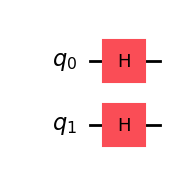

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from qiskit import *
from qiskit.visualization import plot_histogram
from qiskit import QuantumCircuit

circ = QuantumCircuit(2,0)
circ.h(0)
circ.h(1)
circ.draw('mpl')

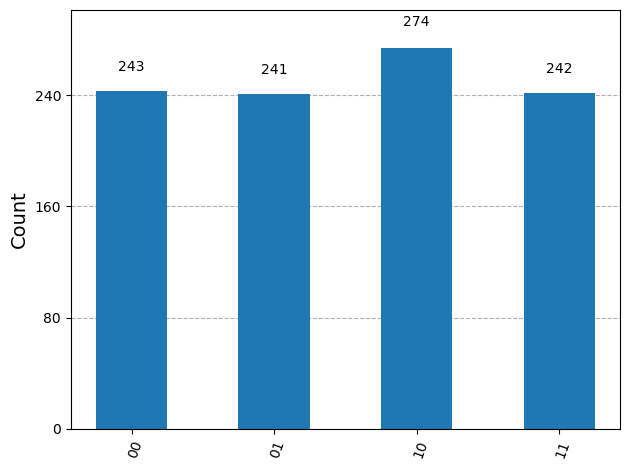

In [3]:
from qiskit_aer.primitives import SamplerV2 as Sampler
sampler = Sampler()
circ.measure_all()
result = sampler.run([circ], shots=1000).result()
counts = result[0].data.meas.get_counts() 
plot_histogram(counts)

## First time step

How do we implement $e^{-i\hat{H}_0\Delta t}$ with gates? Let's make things more concrete first, and consider a simple 2-site Ising problem. 
- $ \hat{H}_0 = - \sigma^x_0 - \sigma^x_1$
- $ \hat{H}_1 = J\sigma^z_0\sigma^z_1 + \mu\sigma^z_0 + \mu\sigma^z_1$
- $J = 1$
- $\mu = .1$

or by simplifying the notation a bit:
- $ \hat{H}_0 = - \hat{x}_0 - \hat{x}_1$
- $ \hat{H}_1 = J\hat{z}_0\hat{z}_1 + \mu\hat{z}_0 + \mu\hat{z}_1$
- $J = 1$
- $\mu = .1$


Because $\hat{x}_0$ and $\hat{x}_1$ act on different qubits, they commute, meaning that we can break this first time step up into 2 sequential steps exactly:
$$ 
e^{i\left(\hat{x}_0 + \hat{x}_1\right)\Delta t} = e^{i\hat{x}_0\Delta t} e^{i\hat{x}_1\Delta t} 
$$

Let's choose a small time step, say $\Delta t = .1$. 
Remembering the fact that `rx(θ,n)`: $e^{-i\tfrac{\theta}{2} \hat{x}_n}$,
we can use the following quantum circuit to implement this time step:

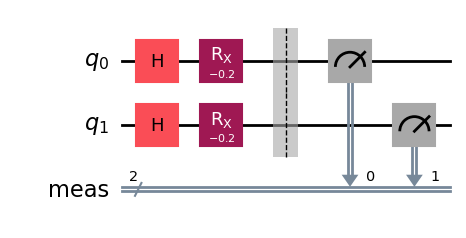

In [4]:
circ = QuantumCircuit(2,0)
circ.h(0)
circ.h(1)
circ.rx(-2*.1,1)
circ.rx(-2*.1,0)
circ.measure_all()
circ.draw(output = 'mpl', style="iqp")

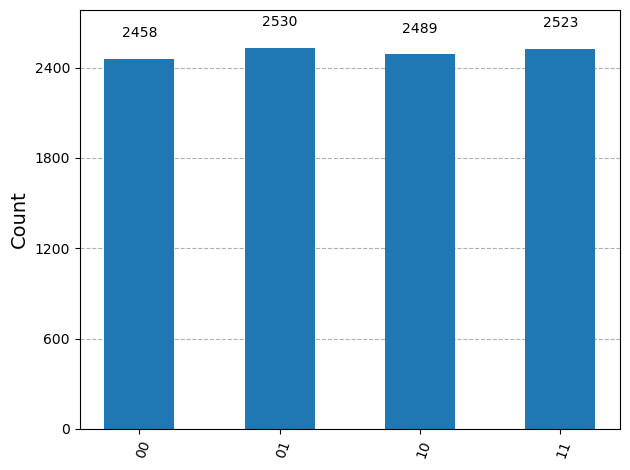

In [5]:
nshots = 10000
plot_histogram(sampler.run([circ], shots=nshots).result()[0].data.meas.get_counts())

# **Question**: 
Explain why the measured probability stayed the same in the above plot:

---

## Second time step

Now we must implement the following operator: $e^{-i\left(.75\hat{H}_0 + .25\hat{H}_1\right)\Delta t}$. 

Unfortunately, $zx \neq xz$ and so we can't exactly trotterize this. 
However, because $\Delta t \ll 1$, we can approximate this in a product form, and this will become increasingly more accurate as we take smaller time steps. 

$$ \hat{H}_0 = - \hat{x}_0 - \hat{x}_1$$
$$ \hat{H}_1 = J\hat{z}_0\hat{z}_1 + \mu\hat{z}_0 + \mu\hat{z}_1$$

$$
e^{-i\left(- \tfrac{3}{4}\hat{x}_0 - \tfrac{3}{4}\hat{x}_1 + \tfrac{1}{4} J\hat{z}_0\hat{z}_1 + \tfrac{1}{4}\mu\hat{z}_0 + \tfrac{1}{4}\mu\hat{z}_1\right)\Delta t}
\approx
e^{i\tfrac{3}{4}\hat{x}_0\Delta t} 
e^{i\tfrac{3}{4}\hat{x}_1\Delta t}
e^{-i \tfrac{1}{4} J\hat{z}_0\hat{z}_1 \Delta t}
e^{-i \tfrac{1}{4} \mu\hat{z}_0 \Delta t}
e^{-i \tfrac{1}{4} \mu\hat{z}_1 \Delta t}
$$

Notice here that we are using a new gate, `RZZ`. 
This is a 2-qubit gate that rotates about the product of two $\hat{z}$ operators.

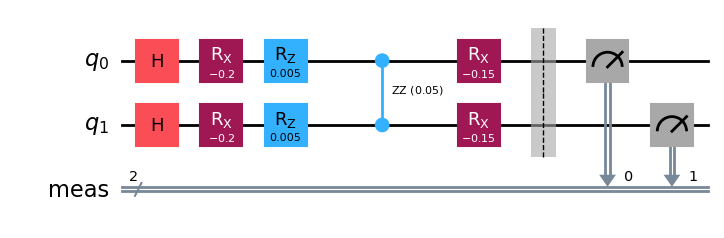

In [6]:
circ = QuantumCircuit(2,0)
# initialize
circ.h(0)
circ.h(1)

# time step 1
circ.rx(-2*.1,1)
circ.rx(-2*.1,0)

# time step 2
circ.rz(2 * .1 * .25 * .1,1)
circ.rz(2 * .1 * .25 * .1,0)
circ.rzz(2 * 1. * .25 * .1,0,1)
circ.rx(-2 * .75 * .1,1)
circ.rx(-2 * .75 * .1,0)
circ.measure_all()
circ.draw(output = 'mpl')

From here we can recognize the pattern and start to generalize with a function!


## Automate the circuit building

Because each step will have the same gates, but different angles, we can simply write a function to create the circuit. 

In [7]:

def form_circuit(N, T, ham):
    print(" Write your code here. This should return a quantum circuit") 


## Demonstrations 

Try out different numbers of steps and different Hamiltonians. 
- $\hat{H}(t) = (1-f(t))\hat{H}_0 + f(t)\hat{H}_1$


Let's build a random 1D Ising Hamiltonian:

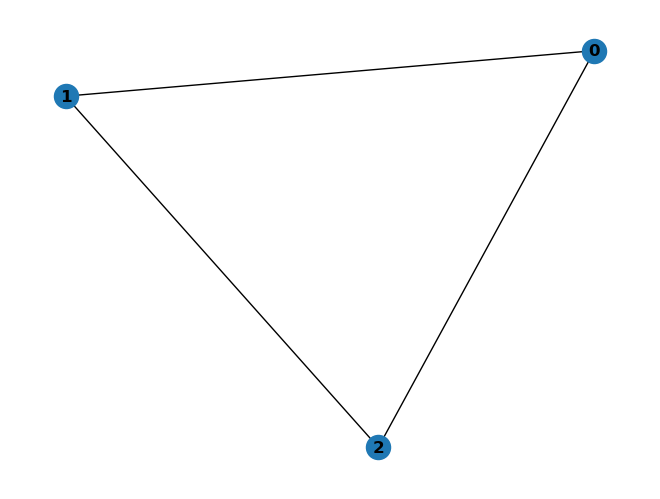

0 1 -0.09850700058060835
0 2 0.9037743441264536
1 2 0.5963281937459599


In [8]:
import graphbuilder
import networkx as nx
import random
import montecarlo

G = graphbuilder.build_1d_graph(3)
# Now Draw the graph. 
plt.figure(1)
nx.draw(G, with_labels=True, font_weight='bold')
plt.show()

for (i,j) in G.edges:
    G.edges[(i,j)]["weight"] = (random.random()*2 - 1)
    print(i,j, G.edges[(i,j)]["weight"])

ham = montecarlo.IsingHamiltonian(G)
# let's add a local mu value to the first spin
# ham.mu[0] = -1.2 
for i in range(ham.N):
    ham.mu[i] = random.random()


In [9]:
from qiskit.transpiler import generate_preset_pass_manager
from qiskit.transpiler.preset_passmanagers import generate_preset_pass_manager

T = 20 
N = 100

# This is the function you need to implement
circ = form_circuit(N, T, ham)


pm = generate_preset_pass_manager(optimization_level=3, basis_gates=["rz","rx","cx"])
circ = pm.run(circ)
circ.draw(output="mpl")

pm = generate_preset_pass_manager(optimization_level=3, basis_gates=["rz","rx", "cx"])
circ = pm.run(circ)
# circ.draw(output="mpl")

 Write your code here. This should return a quantum circuit


AttributeError: 'NoneType' object has no attribute '_data'

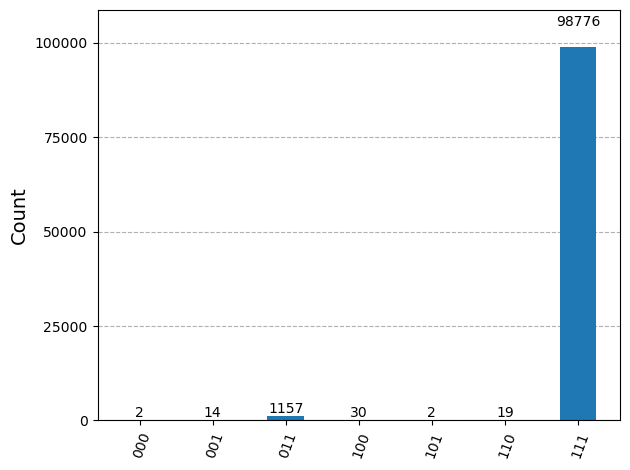

In [36]:
nshots = 100000
plot_histogram(sampler.run([circ], shots=nshots).result()[0].data.meas.get_counts())


In [37]:
samples = sampler.run([circ], shots=nshots).result()[0].data.meas.get_counts()
max(samples, key=samples.get)

'111'

# Validation
How well does this match the exact result?

Text(0, 0.5, 'Energy')

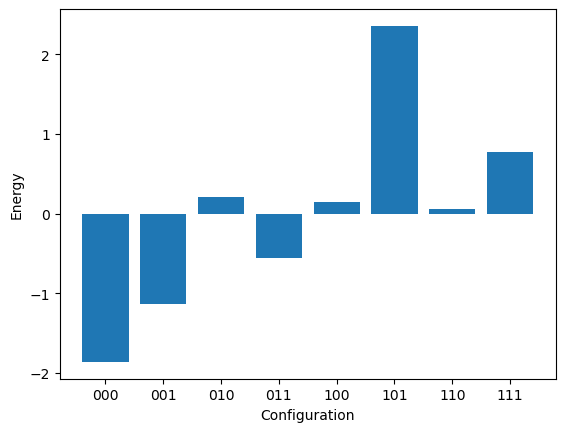

In [38]:
import copy as cp
configs = []
energies = []
conf = montecarlo.BitString(ham.N)
for i in range(2**ham.N):
    conf.set_integer_config(i)
    configs.append(str(conf))
    energies.append(ham.energy(conf))
plt.bar(configs, energies)
plt.xlabel('Configuration')
plt.ylabel('Energy')


**Note:** Since 0 and 1 have opposite meanings between the classical and quantum examples (0 was spin down classically, while $\ket{1}$ was the negative eigenvalue of $\hat{z}$), the bitstrings should be opposite one another. For example, the classical state `0101` corresponds to the `1010` state. However, Qiskit prints the bitstrings from right to left, whereas we print ours from left to write, so that means `1010` corresponds to `1010`, and `101` corresponds to `010`. 

# **Question**: 
What are the probabilities for measuring the correct bitstring using the following number of time steps (i.e., values of `n_steps`):
1.  `n_steps` = 3
1.  `n_steps` = 4
1.  `n_steps` = 8
1.  `n_steps` = 10 